# Vamos a utilizar K-Means para clasificar variables de heart.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
df4=pd.read_csv("C:/Users/FranciscoJosé/Documents/MySite/heart-disease-uci/heart.csv",decimal=',')

In [3]:
df4.tail(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df4.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Vemos la relación entre o y 1
print(df4.groupby('target').size())

target
0    138
1    165
dtype: int64


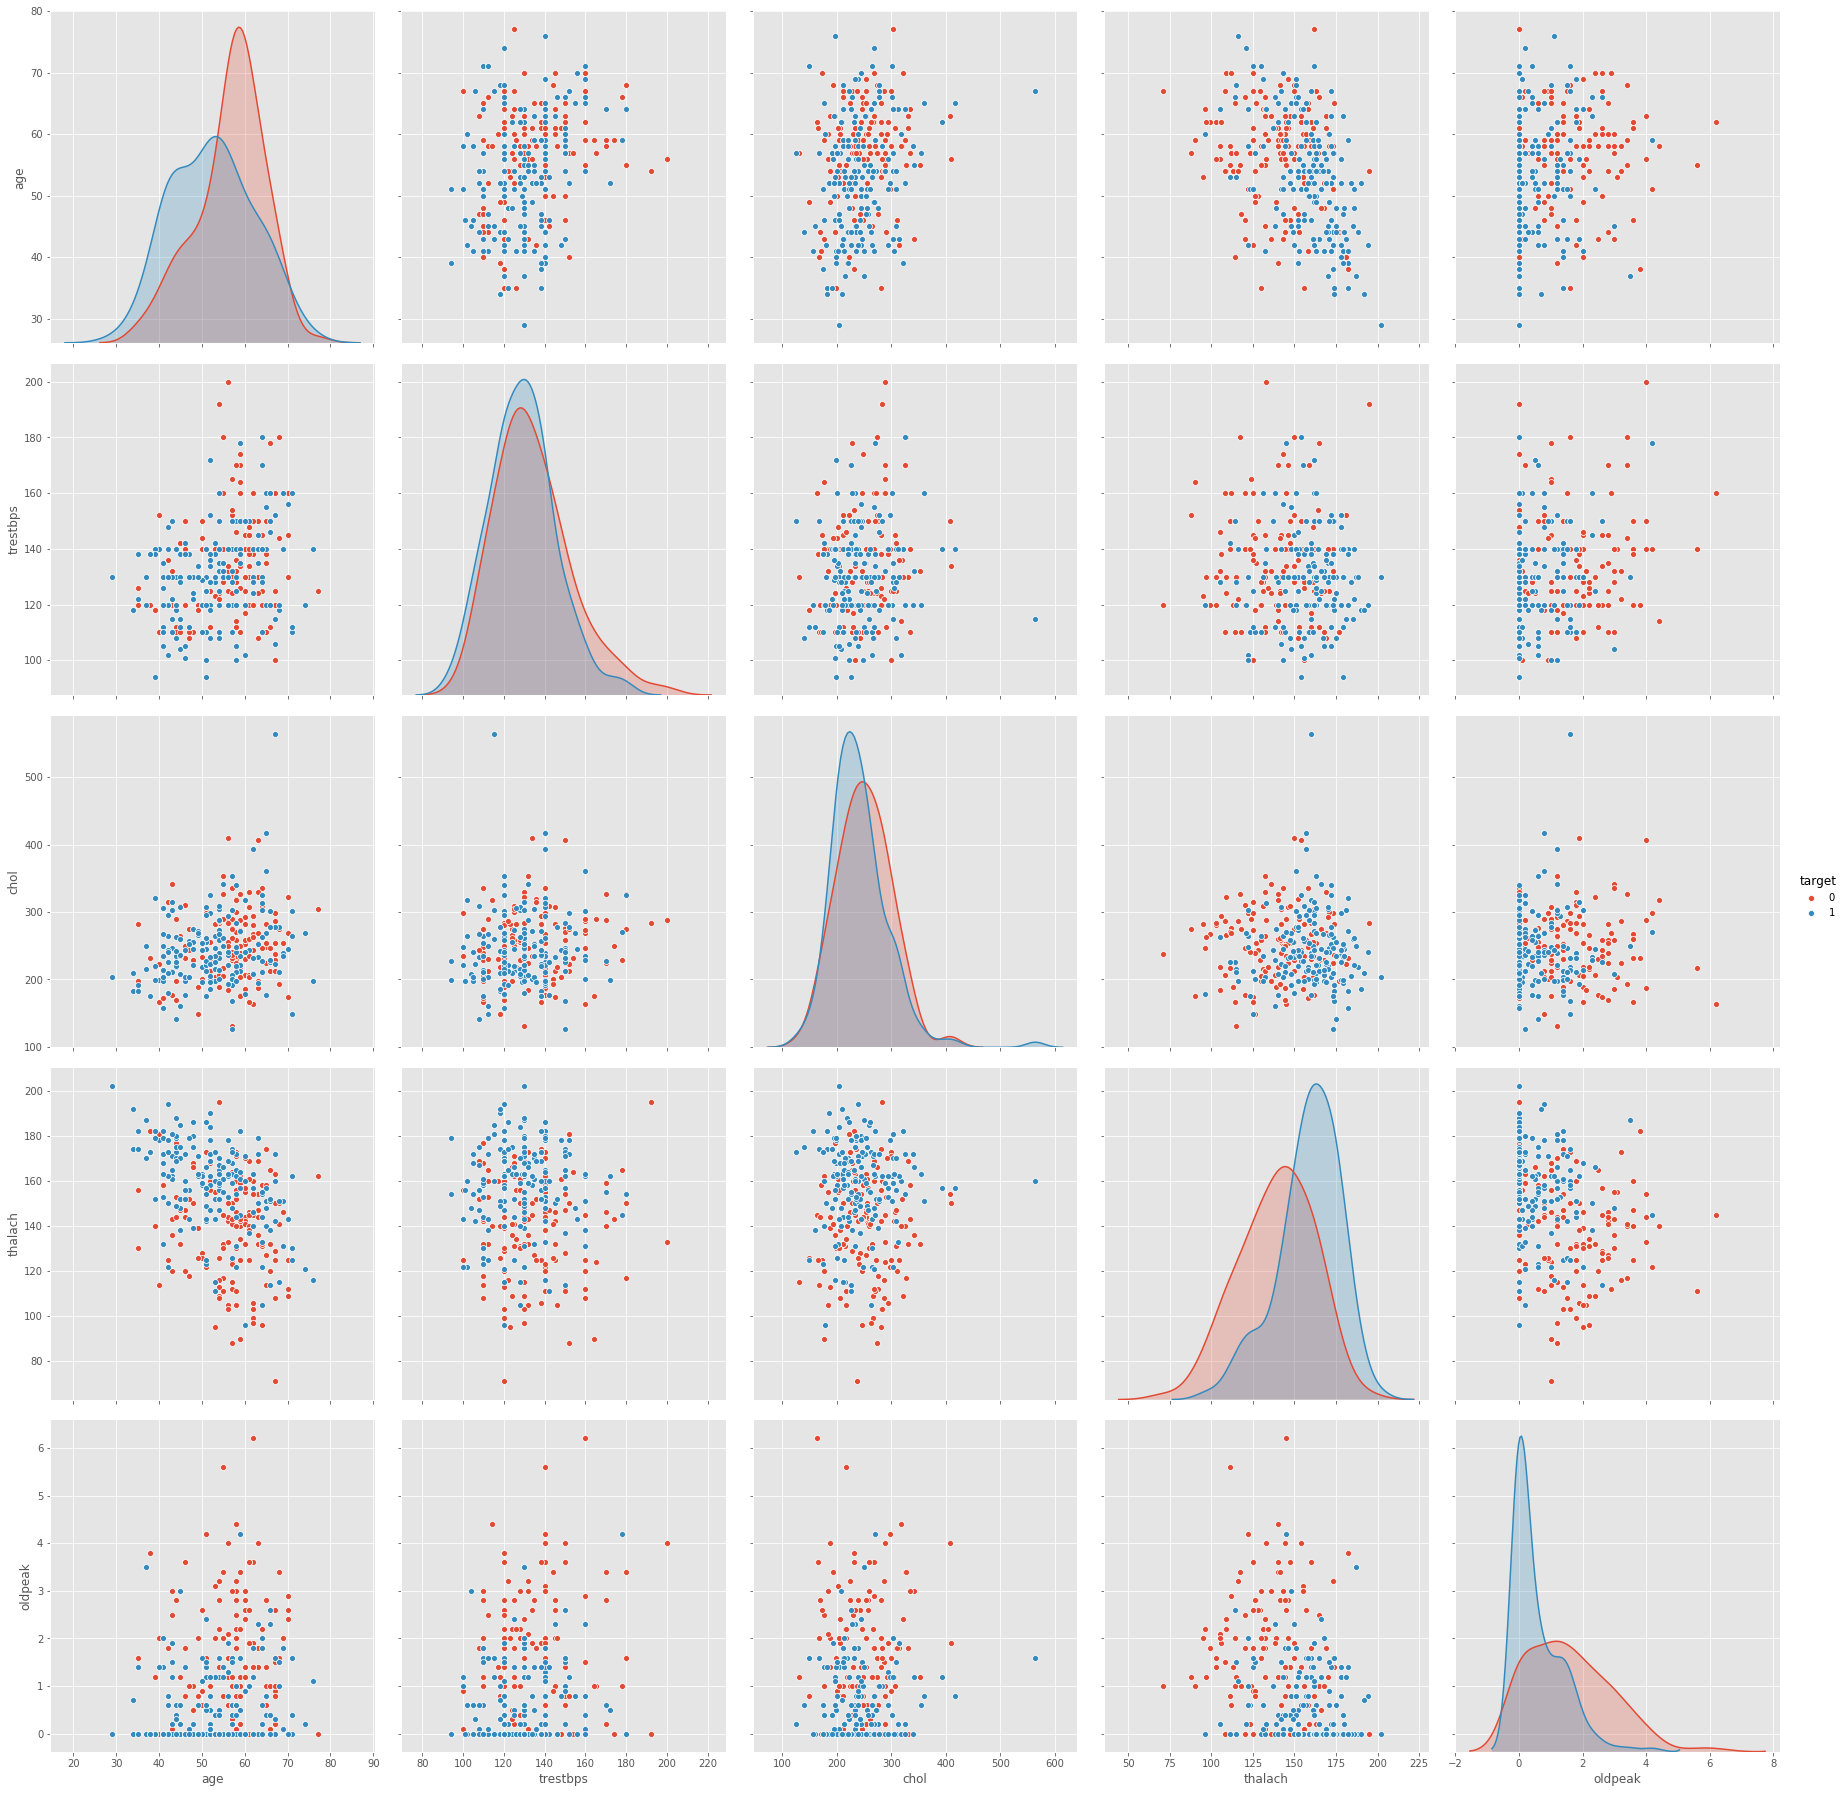

In [6]:
# Analizamos las variables a reducir
sb.pairplot(df4.dropna(), hue='target',height=5,vars=["age","trestbps","chol","thalach","oldpeak"],kind='scatter')

In [7]:
#Definimos las entradas
X = np.array(df4[["age","trestbps","chol","thalach","oldpeak"]])
y = np.array(df4['target'])
X.shape

(303, 5)

# Obtener el valor de K para la clasificación

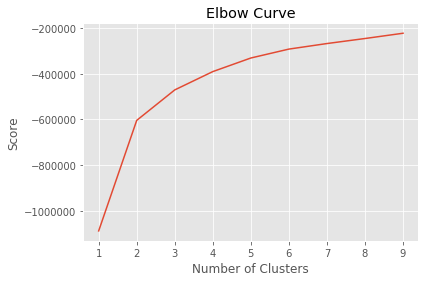

In [11]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [12]:
# Probamos con K=2
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)


[[ 53.06217617 129.74611399 216.25906736 151.81865285   0.97357513]
 [ 56.65454545 134.91818182 298.90909091 145.83636364   1.15545455]]


In [13]:
labels=kmeans.predict(X)
print(labels)

[0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1
 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0
 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0
 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0]


In [11]:
labels.dtype

dtype('int32')

In [14]:
#vemos el representante del grupo, el enfermo cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([158,   6], dtype=int64)

In [15]:
#Clasificar nuevos pacientes
X_new = np.array([[57,130,236,174,0]]) # paciente 1

new_labels = kmeans.predict(X_new)
print(new_labels)

[0]


In [16]:
df4['kmean']=labels

In [17]:
df4.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,kmean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0


In [18]:
drop_elements = ['age','trestbps','chol','thalach','oldpeak']
df5 = df4.drop(drop_elements, axis = 1)

In [39]:
df5.tail(1)
         

,sex,cp,fbs,restecg,exang,slope,ca,thal,target,kmean
302,0,1,0,0,0,1,1,2,0,0


In [20]:
#Reordenamos las columnas
df6=df5[ ['target','sex', 'cp', 'fbs','restecg','exang','slope','ca','thal','kmean'] ]
df6.dropna(inplace=True)
df6.head()

,target,sex,cp,fbs,restecg,exang,slope,ca,thal,kmean
0,1,1,3,1,0,0,0,0,1,0
1,1,1,2,0,1,0,0,0,2,0
2,1,0,1,0,0,0,2,0,2,0
3,1,1,1,0,1,0,2,0,2,0
4,1,0,0,0,1,1,2,0,2,1


In [21]:
# Imports needed for the script
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [22]:
# Probamos el algoritmo y buscamos el mejor resultado
cv = KFold(n_splits=20) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(df5))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = [] 
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=10,
                                             min_samples_leaf=3,
                                             max_depth = depth,
                                             class_weight={1:1.24})
    for train_fold, valid_fold in cv.split(df5):
        f_train = df5.loc[train_fold] 
        f_valid = df5.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['target'], axis=1), 
                               y = f_train["target"]) 
        valid_acc = model.score(X = f_valid.drop(['target'], axis=1), 
                                y = f_valid["target"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.725208
         2          0.743333
         3          0.817083
         4          0.810625
         5          0.824583
         6          0.817917
         7          0.801250
         8          0.811250
         9          0.814583
        10          0.807917


In [23]:
# Crear arrays de entrenamiento y las etiquetas que indican si tieno o no la enfermedad
y_train = df5['target']
x_train = df5.drop(['target'], axis=1).values 

# Crear Arbol de decision con profundidad = 5 (Donde obtuvimos un 0.824583 )
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=10,
                                            min_samples_leaf=3,
                                            max_depth = 5,
                                            class_weight={1:1.24})
decision_tree.fit(x_train, y_train)

# exportar el modelo a archivo .dot
with open(r"C:/tran/tree2.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 5,
                              impurity = True,
                              feature_names = list(df5.drop(['target'], axis=1)),
                              class_names = ['No', 'Illness'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'C:/tran/tree1.dot','-o',r'C:/tran/tree1.png'])


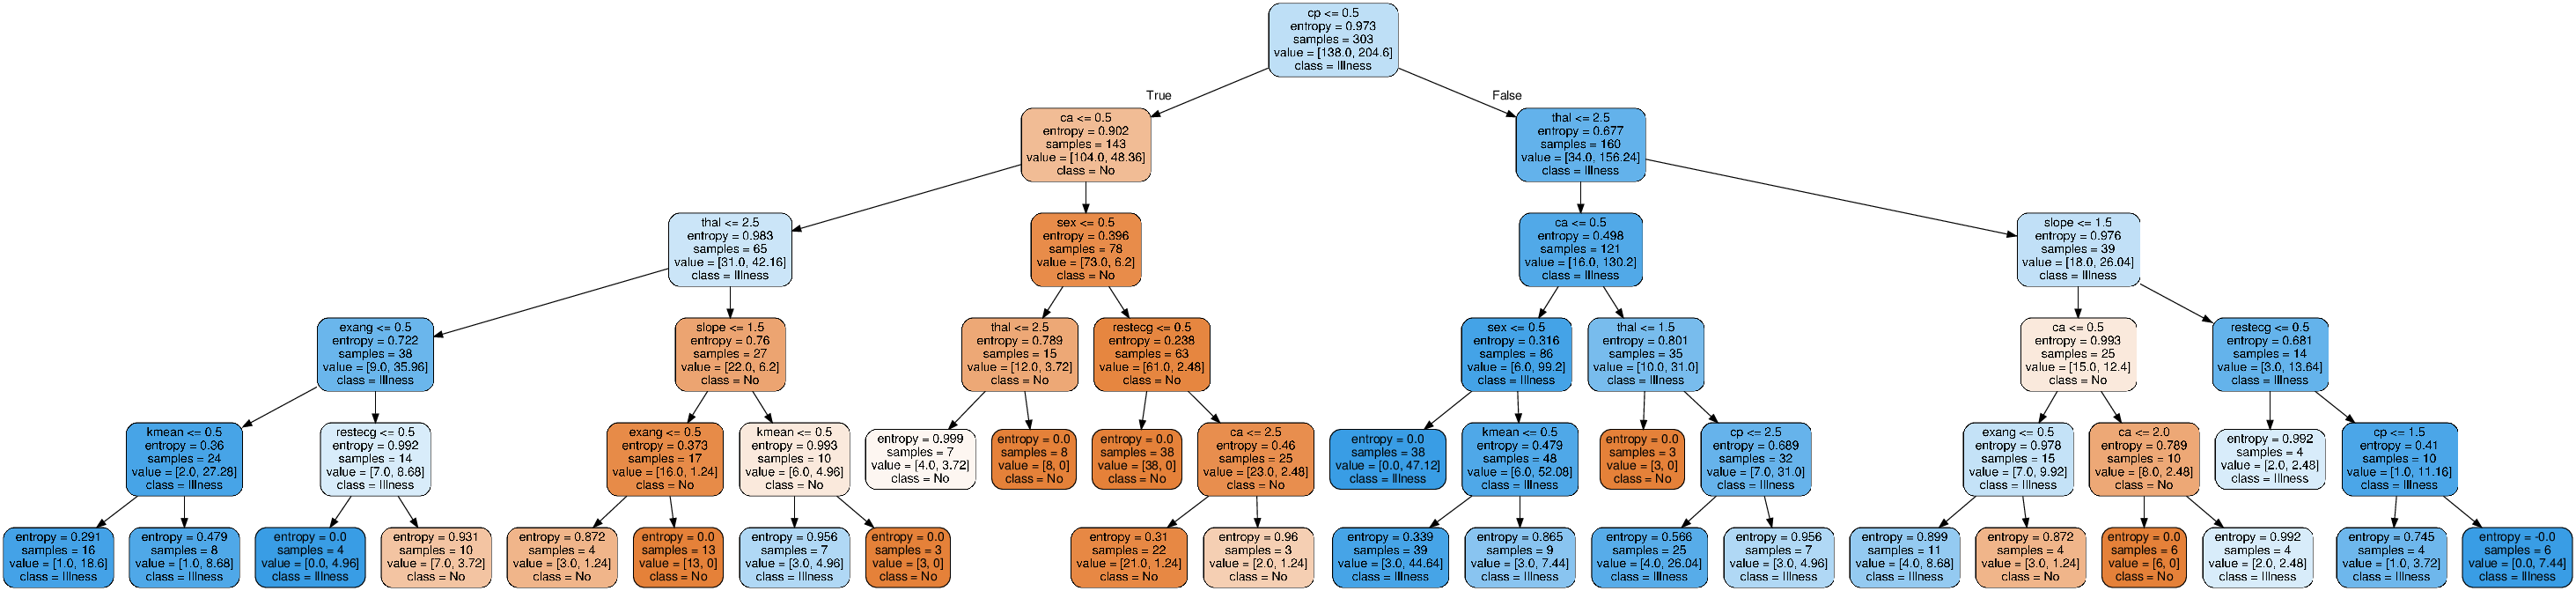

In [38]:
PImage("C:/tran/tree3.png")

In [24]:
#Determinando la precisión del algoritmo
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

87.79


In [36]:
#predecir paciente enfermo


x_test = pd.DataFrame(columns=('target','sex', 'cp', 'fbs','restecg','exang','slope','ca','thal','kmean'))
x_test.loc[0] = (1,1,3,1,0,0,0,0,1,0)
y_pred = decision_tree.predict(x_test.drop(['target'], axis = 1))
print("Prediccion: " + str(y_pred))
y_proba = decision_tree.predict_proba(x_test.drop(['target'], axis = 1))
print("Probabilidad de acierto",y_proba[0][1]*100,'%')

Prediccion: [1]
Probabilidad de acierto 93.70277078085643 %


In [37]:
# Predecir pacienta sano
x_test = pd.DataFrame(columns=('target','sex', 'cp', 'fbs','restecg','exang','slope','ca','thal','kmean'))
x_test.loc[0] = (0,1,2,1,1,0,1,1,1,1)
y_pred = decision_tree.predict(x_test.drop(['target'], axis = 1))
print("Prediccion: " + str(y_pred))
y_proba = decision_tree.predict_proba(x_test.drop(['target'], axis = 1))
print("Probabilidad de acierto",y_proba[0][0]*100,'%')

Prediccion: [0]
Probabilidad de acierto 100.0 %


In [27]:
x_test = df6

y_pred = decision_tree.predict(x_test.drop(['target'], axis = 1))

In [28]:
df6['pred']=y_pred

In [29]:
df6.describe()

,target,sex,cp,fbs,restecg,exang,slope,ca,thal,kmean,pred
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.544554,0.683168,0.966997,0.148515,0.528053,0.326733,1.399340,0.729373,2.313531,0.363036,0.600660
std,0.498835,0.466011,1.032052,0.356198,0.525860,0.469794,0.616226,1.022606,0.612277,0.481671,0.490573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,1.000000,1.000000
